# **Insurance Cost Analysis**

For this project, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries


In [33]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
filepath = 'medical_insurance_dataset.csv'

## Import the dataset



In [4]:
df=pd.read_csv(filepath,header=None)
df.head(10)


,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [5]:
headers=['Age','Gender','BMI','No_of_children','Smoker','Region','Charges']
df.columns=headers
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [6]:
df.replace("?",np.NaN,inplace=True)


## Data Wrangling


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2768 non-null   object 
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2765 non-null   object 
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [14]:
mean_age=df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.NaN,mean_age,inplace=True)
mode_smoker=df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.NaN,mode_smoker,inplace=True)
df['Age']=df['Age'].astype("int")
df['Smoker']=df['Smoker'].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int32  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_of_children  2772 non-null   int64  
 4   Smoker          2772 non-null   int32  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [15]:
df[["Charges"]]=np.round(df[["Charges"]],2)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## Exploratory Data Analysis (EDA)

Implementing the regression plot for `charges` with respect to `bmi`. 

(0.0, 66902.85800000001)

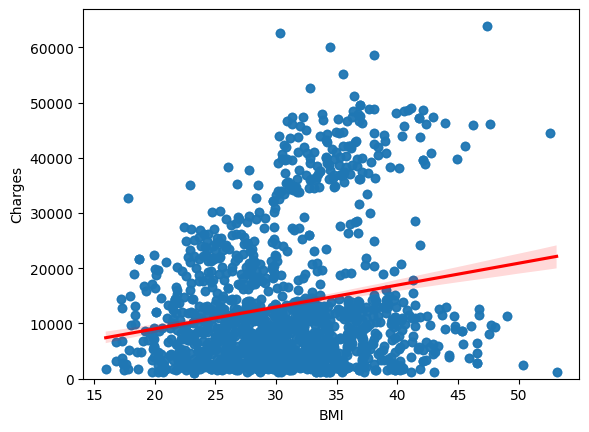

In [16]:
sns.regplot(x="BMI",y="Charges",data=df,line_kws={"color":"red"})
plt.ylim(0,)

Implementing the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='Smoker', ylabel='Charges'>

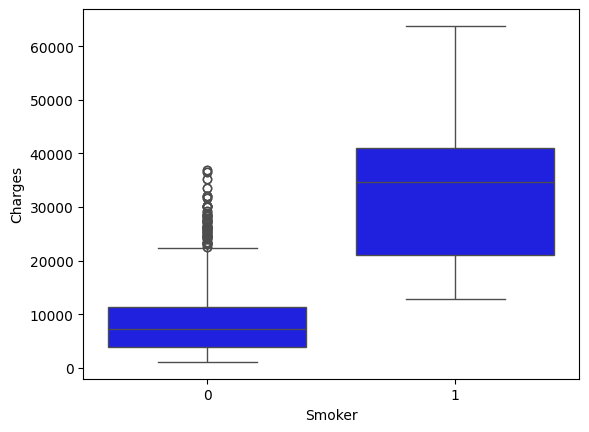

In [18]:
sns.boxplot(x="Smoker",y="Charges",data=df,color="b")

correlation matrix for the dataset.


In [19]:
print(df.corr())

                     Age    Gender       BMI  No_of_children    Smoker  \
Age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
Gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
BMI             0.113048  0.042924  1.000000       -0.001492  0.011489   
No_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
Smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
Region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
Charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  Region   Charges  
Age            -0.007167  0.298624  
Gender          0.022213  0.062837  
BMI             0.271119  0.199846  
No_of_children -0.025717  0.066442  
Smoker          0.054077  0.788783  
Region          1.000000  0.054058  
Charges         0.054058  1.000000  


## Model Development

**Single Linear Regression Model**


In [23]:

lr=LinearRegression()
X=df[['Smoker']]
Y=df[['Charges']]
lr.fit(X,Y)
print(lr.score(X,Y))


0.6221791733924185


**Multiple Linear Regression Model**

In [25]:
Z=df[['Age','Gender','BMI','No_of_children','Smoker','Region']]
lr.fit(Z,Y)
lr.score(Z,Y)


0.7504083820289634

**Pipelining**

Training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset.


In [32]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
yhat=pipe.predict(Z)
print(r2_score(Y,yhat))

0.8452584825850527


## Model Refinement

Spliting the data into training and testing subsets, assuming that 30% of the data will be reserved for testing.


In [34]:
x_train,x_test,y_train,y_test=train_test_split(Z,Y,test_size=0.3,random_state=1)

**Ridge regressor** that uses hyperparameter $ \alpha = 0.1 $. Fitting the model using training data data subset.


In [35]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7115696971487694


**Polynomial transformation** to the training parameters with degree=2. 


In [37]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat=RidgeModel.predict(x_test_pr)
r2_score(y_test,y_hat)

0.8133405851901191